In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Data Analysis on Titanic Dataset

## Load the data

In [2]:
df = pd.read_csv('../datasets/Titanic/Titanic.csv')
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


## Get some stats

In [3]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [4]:
# show number of missing values in 'age' column:
age_nan_values = df['age'].isna().sum()
age_nan_values

177

## Stats concepts: Mean vs Median

In [5]:
# let's have next simple dataset:
test_df = pd.DataFrame({
    'age': [10, 20, 30, np.NAN],
    'sex': ['male',np.NAN,'male', 'female'],
    'weight':[35, 70, 55, 80]
})
test_df['age'].sort_values()

0    10.0
1    20.0
2    30.0
3     NaN
Name: age, dtype: float64

In [6]:
test_df.describe()

,age,weight
count,3.0,4.0000
mean,20.0,60.0000
std,10.0,19.5789
min,10.0,35.0000
25%,15.0,50.0000
50%,20.0,62.5000
75%,25.0,72.5000
max,30.0,80.0000


In [7]:
# mean == средна аритметична стойност
mean_age = test_df['age'].sum()/test_df['age'].count()
mean_age

20.0

In [8]:
# median = медиана

# 1,2,3     => 2
# 1,4,5     => 4
# 1,2,3,4,5 => 3
# 1,2,3,4   => 2,5
# 1,2       => 1.5

print( np.median( [1,2,3] ) )
print( np.median( [1,4,5] ) )
print( np.median( [1,2,3,4,5] ) )
print( np.median( [1,2,3,4] ) )
print( np.median( [1,2] ) )


2.0
4.0
3.0
2.5
1.5


In [9]:
print( np.median( [1,2,2,3,3,4,4,4,4,100] ) )
print( np.mean( [1,2,2,3,3,4,4,4,4,4,100] ) )

3.5
11.909090909090908


## Replace NaN values


### Show NaN values in dataset

In [24]:
df.isna().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [16]:
age_median = df['age'].median()
df['age'] = df['age'].fillna(age_median)

In [17]:
df['age'].isna().sum()

0

In [20]:
filter = df['embarked'].isna()
df[filter ]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
61,female,38.0,0,0,80.0,NaN,First,woman,True,1
829,female,62.0,0,0,80.0,NaN,First,woman,True,1


In [23]:
df.dropna(axis=0, inplace=True)

In [25]:
df['fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

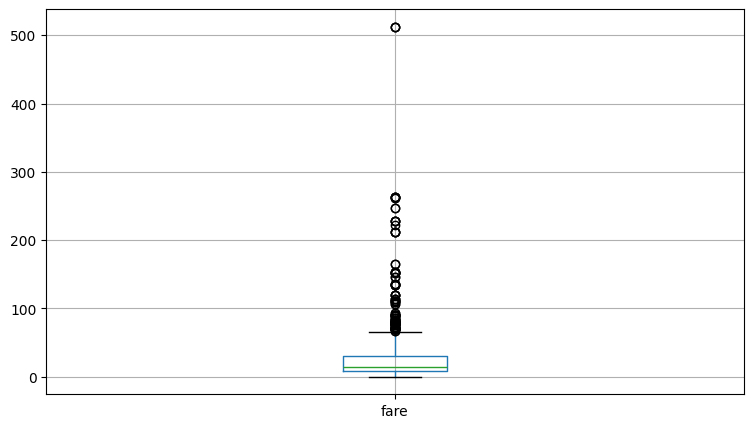

In [35]:
df.boxplot(column=['fare'], figsize=(9,5))
plt.show()

In [34]:
df['fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [45]:
# show rows where 'fare'>=200
filter = df['fare']>=200
df[filter].sort_values(by='fare')

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
779,female,43.0,0,1,211.3375,S,First,woman,False,1
730,female,29.0,0,0,211.3375,S,First,woman,True,1
689,female,15.0,0,1,211.3375,S,First,child,False,1
377,male,27.0,0,2,211.5000,C,First,man,False,0
527,male,28.0,0,0,221.7792,S,First,man,True,0
716,female,38.0,0,0,227.5250,C,First,woman,True,1
700,female,18.0,1,0,227.5250,C,First,woman,False,1
380,female,42.0,0,0,227.5250,C,First,woman,True,1
557,male,28.0,0,0,227.5250,C,First,man,True,0
118,male,24.0,0,1,247.5208,C,First,man,False,0


In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
